<a href="https://colab.research.google.com/github/navruzbek1/Datasets/blob/main/bismillah_loyiha1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
gender=pd.read_csv("/content/gender_submission.csv")
test=pd.read_csv("/content/test.csv")
train=pd.read_csv("/content/train.csv")

In [119]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [120]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [121]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [122]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [123]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [124]:
train.loc[train.Sex=="male","Sex"]=1
train.loc[train.Sex=="female","Sex"]=0

In [125]:
train.drop(["PassengerId","Name","Ticket","Fare","Embarked"],axis=1,inplace=True)

In [126]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
0,0,3,1,22.0,1,0,NaN
1,1,1,0,38.0,1,0,C85
2,1,3,0,26.0,0,0,NaN
3,1,1,0,35.0,1,0,C123
4,0,3,1,35.0,0,0,NaN


In [127]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

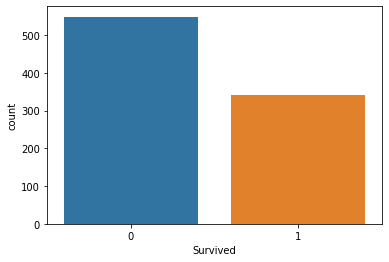

In [128]:
sns.countplot(data=train,x="Survived",)
plt.show()

In [129]:
train.corrwith(train["Survived"]).sort_values(ascending=False)

Survived    1.000000
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
dtype: float64

In [130]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [131]:
549+342


891

In [132]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

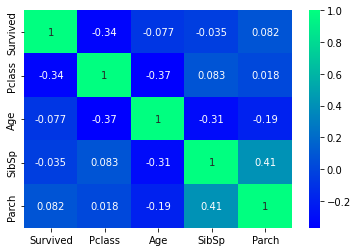

In [133]:
sns.heatmap(train.corr(),cmap='winter',annot=True)
plt.show()

In [134]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000


In [ ]:
#yuqori korr bor demak,Age->Pclass,Pclass->Survived,Age->SibSp,SibSp->Parch,

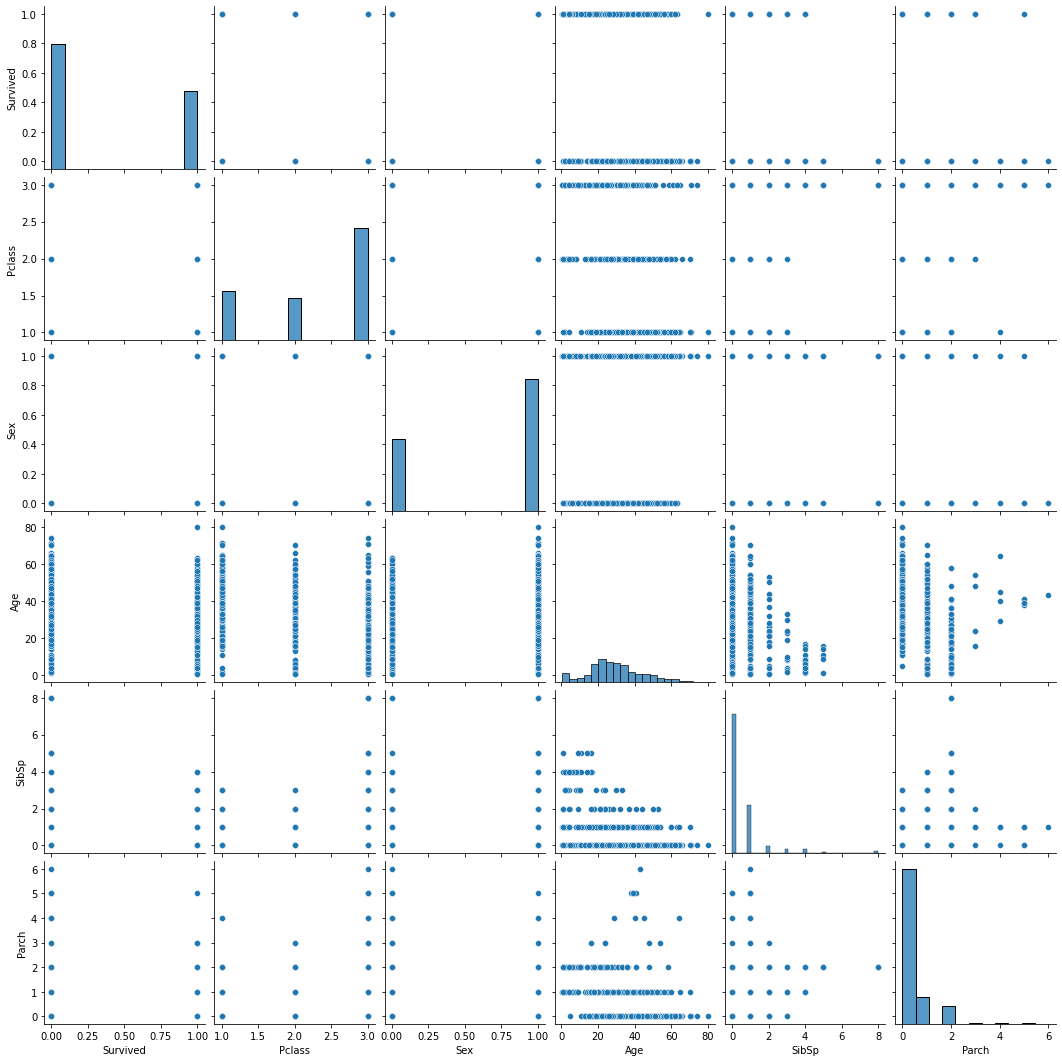

In [135]:
sns.pairplot(data=train)

In [136]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
0,0,3,1,22.0,1,0,NaN
1,1,1,0,38.0,1,0,C85
2,1,3,0,26.0,0,0,NaN
3,1,1,0,35.0,1,0,C123
4,0,3,1,35.0,0,0,NaN


In [137]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [138]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Cabin       687
dtype: int64

In [139]:
train.isnull().sum()*100/len(train)

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Cabin       77.104377
dtype: float64

In [140]:
def missing_percent(df):
    nan_percent= 100*(df.isnull().sum()/len(df))
    nan_percent= nan_percent[nan_percent>0].sort_values()
    return nan_percent

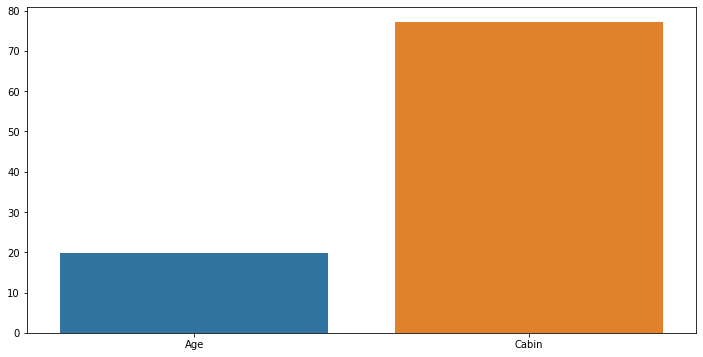

In [141]:
salom=missing_percent(train)
plt.figure(figsize=(12,6))
sns.barplot(x=salom.index,y=salom)

In [142]:
train.Age=train.Age.fillna(train.Age.median())

In [143]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Cabin       687
dtype: int64

In [144]:
train.drop("Cabin",axis=1,inplace=True)

In [145]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


In [146]:
train[["Survived","Pclass"]]=train[["Survived","Pclass"]].astype(dtype="str")

In [147]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 41.9+ KB


In [149]:
train_num=train.select_dtypes(exclude="object")
train_obj=train.select_dtypes(include="object")

In [151]:
train_obj

,Survived,Pclass,Sex
0,0,3,1
1,1,1,0
2,1,3,0
3,1,1,0
4,0,3,1
...,...,...,...
886,0,2,1
887,1,1,0
888,0,3,0
889,1,1,1


In [152]:
train_obj.drop("Survived",axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [153]:
train_obj=pd.get_dummies(train_obj,drop_first=True)

In [159]:
train.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [154]:
train_obj

,Pclass_2,Pclass_3,Sex_1
0,0,1,1
1,0,0,0
2,0,1,0
3,0,0,0
4,0,1,1
...,...,...,...
886,1,0,1
887,0,0,0
888,0,1,0
889,0,0,1


In [155]:
final_train=pd.concat([train_num,train_obj,train["Survived"]],axis=1)

In [156]:
final_train

,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_1,Survived
0,22.0,1,0,0,1,1,0
1,38.0,1,0,0,0,0,1
2,26.0,0,0,0,1,0,1
3,35.0,1,0,0,0,0,1
4,35.0,0,0,0,1,1,0
...,...,...,...,...,...,...,...
886,27.0,0,0,1,0,1,0
887,19.0,0,0,0,0,0,1
888,28.0,1,2,0,1,0,0
889,26.0,0,0,0,0,1,1


In [160]:
final_train.shape

(891, 7)

In [161]:
x_train=final_train.drop("Survived",axis=1)
y_train=final_train["Survived"]

In [162]:
from sklearn.model_selection import train_test_split

In [163]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.1,random_state=101)

In [164]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [165]:
scaler.fit(x_train)

StandardScaler()

In [167]:
scaled_x_train=scaler.transform(x_train)
scaled_x_test=scaler.transform(x_test)

**MODELNI QURAMIZ
**

In [168]:
from sklearn.neighbors import KNeighborsClassifier

In [169]:
knn_model=KNeighborsClassifier(n_neighbors=1)

In [170]:
knn_model.fit(scaled_x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [171]:
y_pred=knn_model.predict(scaled_x_test)

In [172]:
pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

,y_test,y_pred
331,0,0
700,1,1
748,0,0
751,1,1
481,0,1
...,...,...
320,0,0
288,1,0
827,1,1
847,0,0


In [176]:
y_pred

array(['0', '1', '0', '1', '1', '0', '1', '0', '1', '1', '1', '1', '1',
       '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0',
       '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '1', '0',
       '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '1', '0',
       '1', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0',
       '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1',
       '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0'],
      dtype=object)

In [177]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [178]:
accuracy_score(y_test,y_pred)

0.7333333333333333

In [179]:
confusion_matrix(y_test,y_pred)

array([[38, 13],
       [11, 28]])

In [180]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76        51
           1       0.68      0.72      0.70        39

    accuracy                           0.73        90
   macro avg       0.73      0.73      0.73        90
weighted avg       0.74      0.73      0.73        90



In [181]:
test_error_rate=[]



for k in range (1,30):
  knn_model=KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(scaled_x_train,y_train)

  y_pred_test=knn_model.predict(scaled_x_test)  

  test_error=1-accuracy_score(y_test,y_pred_test)
  test_error_rate.append(test_error)

In [182]:
test_error_rate

[0.2666666666666667,
 0.24444444444444446,
 0.18888888888888888,
 0.2222222222222222,
 0.1777777777777778,
 0.2222222222222222,
 0.2222222222222222,
 0.2222222222222222,
 0.23333333333333328,
 0.25555555555555554,
 0.24444444444444446,
 0.24444444444444446,
 0.23333333333333328,
 0.24444444444444446,
 0.23333333333333328,
 0.24444444444444446,
 0.21111111111111114,
 0.24444444444444446,
 0.24444444444444446,
 0.24444444444444446,
 0.24444444444444446,
 0.21111111111111114,
 0.21111111111111114,
 0.21111111111111114,
 0.21111111111111114,
 0.21111111111111114,
 0.21111111111111114,
 0.21111111111111114,
 0.21111111111111114]

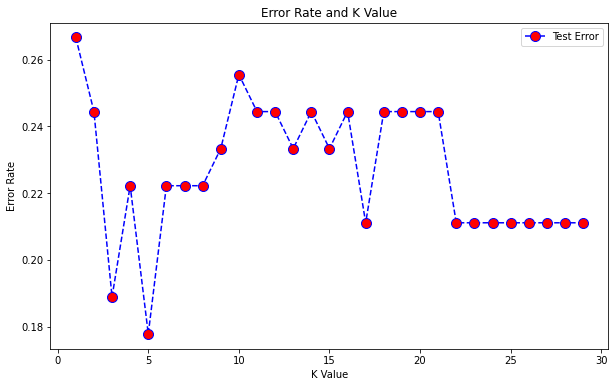

In [187]:
from sklearn.metrics.pairwise import linear_kernel
plt.figure(figsize=(10,6))
plt.plot(range(1,30),test_error_rate,color="b",linestyle="dashed",marker="o",markerfacecolor="r",markersize=10,label="Test Error")
plt.title("Error Rate and K Value")
plt.ylabel("Error Rate")
plt.xlabel("K Value")
plt.legend()
plt.show()

pipeline yaratamiz


In [189]:
scaler=StandardScaler()

In [190]:
knn=KNeighborsClassifier()

In [191]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [192]:
operations=[("scaler",scaler),("knn",knn)]

In [193]:
from sklearn.pipeline import Pipeline

In [194]:
pipe=Pipeline(operations)

In [195]:
from sklearn.model_selection import GridSearchCV
k_values=list(range(1,20))
param_grid={"knn__n_neighbors": k_values}

In [197]:
full_cv_classifier=GridSearchCV(pipe,param_grid,cv=5,scoring="accuracy")
full_cv_classifier.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [198]:
full_cv_classifier.best_estimator_.get_params()

{'knn': KNeighborsClassifier(n_neighbors=16),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 16,
 'knn__p': 2,
 'knn__weights': 'uniform',
 'memory': None,
 'scaler': StandardScaler(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=16))],
 'verbose': False}

In [199]:
full_cv_classifier.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [200]:
scaler= StandardScaler()
knn14= KNeighborsClassifier(n_neighbors=14)
operations= [('scaler', scaler), ('knn14', knn14)]

In [201]:
pipe= Pipeline(operations)

In [203]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn14', KNeighborsClassifier(n_neighbors=14))])

In [205]:
pipe_pred= pipe.predict(x_test)
y_pred_knn=pipe_pred

In [206]:
print(classification_report(y_test, pipe_pred))

              precision    recall  f1-score   support

           0       0.72      0.94      0.81        51
           1       0.87      0.51      0.65        39

    accuracy                           0.76        90
   macro avg       0.79      0.73      0.73        90
weighted avg       0.78      0.76      0.74        90



In [208]:
sample= x_test.iloc[44]

In [209]:
sample

Age         39.0
SibSp        0.0
Parch        0.0
Pclass_2     1.0
Pclass_3     0.0
Sex_1        1.0
Name: 808, dtype: float64

In [210]:
sample.values

array([39.,  0.,  0.,  1.,  0.,  1.])

In [211]:
sample.values.reshape(1, -1)

array([[39.,  0.,  0.,  1.,  0.,  1.]])

In [212]:
pipe.predict(sample.values.reshape(1, -1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array(['0'], dtype=object)

In [213]:
pipe.predict_proba(sample.values.reshape(1, -1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[0.92857143, 0.07142857]])